# Project : Wild Blueberry Yield Prediction

<h2>Index</h2>
<ol>
    <li><a href="#description">Description</a></li>
    <li><a href="#problem-statement">Problem Statement</a></li>
    <li><a href="#loading-necessary-libraries">Loading necessary libraries</a></li>
    <li><a href="#function-definations">Function Definitions</a></li>
    <li><a href="#reading-in-the-dataset">Reading in the Dataset</a></li>
    <li><a href="#exploratory-descriptive-analysiseda">Exploratory Descriptive Analysis (EDA)</a>
        <ol>
            <li><a href="#basic-data-inspection">Basic Data Inspection</a></li>
            <li><a href="#descriptive-statistics">Descriptive Statistics</a></li>
            <li><a href="#duplicate-values">Duplicate Values</a></li>
            <li><a href="#missing-values">Missing Values</a></li>
            <li><a href="#unique-values">Unique Values</a></li>
            <li><a href="#exploring-target-variable">Exploring Target Variable</a></li>
            <li><a href="#data-visualization">Data Visualization</a></li>
        </ol>
    </li>
    <li><a href="#insights">Insights</a></li>
    <li><a href="#preprocessing">Preprocessing</a></li>
    <li><a href="#feature-engineering">Feature Engineering</a></li>
    <li><a href="#modeling">Modeling</a></li>
    <li><a href="#hyperparameter-tuning">Hyperparameter Tuning</a></li>
    <li><a href="#explainable-aixai">Explainable AI (XAI)</a></li>
    <li><a href="#dataframe-pipeline">Dataframe Pipeline</a></li>
</ol>


## Description
   
- This dataset used for predictive modelling was generated from Simulation Modelling of Wild Blueberry Pollination by an open source [GAMA simulation platform V1.7](http://gama-platform.org) , using GAML modelling programming language, which is spatially-explicit computer simulation program, that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agro-ecosystem.

- The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches.

- A total of 77,700 simulations were conducted to achieve both an extensive and intensive sampling effort and this resulted in a dataset consisting of 777 records, each of which is an average of 100 simulation runs.

- The parameters (i.e., the factors of the simulation model) used to configure the simulation experiments are three-fold (Table 3):
    1. The average size of blueberry clones within a field; 
    2. Foraging density of each bee taxon group; and 
    3. Weather information such as temperature, precipitation and wind speed

<hr>

<figure style="display: flex;">
  <img src="..\media\simulated_wild_berry_field_julian_date_136.png" style="flex: 1; max-height: 100%; padding-right: 10px;">
  <figcaption style="flex: 2">
    <ul style = " width = 100%; height: 100%; display: flex; flex-direction: column; justify-content: space-around ;">
      <p>A simulated wild blueberry field on Julian date 136 of the production season.</p>
      <li>The green dots are quadrats in which stems are in bud (before bloom) stage.</li>
      <li>Yellow dots are quadrats in which stems are in bloom.</li>
      <li>Red dots are quadrats in which flowers on stems have become fruit (after bloom).</li>
      <li>Mixed yellow (flower) and green (bud) stem show the pattern of successive waves of flowering within a clone.</li>
      <li>Red stems with different color saturation indicate the percentage of fruit set, i.e., bright red stems have higher fruit set than the dark red ones.</li>
      <li>Black areas are bare spots in the field caused by herbicide applications and erosion.</li>
</ul>
  </figcaption>
</figure>




<hr><br>

<table>
  <thead>
    <tr>
      <th>Features</th>
      <th>Unit</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Clonesize</td>
      <td>m²</td>
      <td>The average blueberry clone size in the field</td>
    </tr>
    <tr>
      <td>Honeybee</td>
      <td>bees/m²/min</td>
      <td>Honeybee density in the field</td>
    </tr>
    <tr>
      <td>Bumbles</td>
      <td>bees/m²/min</td>
      <td>Bumblebee density in the field</td>
    </tr>
    <tr>
      <td>Andrena</td>
      <td>bees/m²/min</td>
      <td>Andrena bee density in the field</td>
    </tr>
    <tr>
      <td>Osmia</td>
      <td>bees/m²/min</td>
      <td>Osmia bee density in the field</td>
    </tr>
    <tr>
      <td>MaxOfUpperTRange</td>
      <td>℃</td>
      <td>The highest record of the upper band daily air temperature during the bloom season</td>
    </tr>
    <tr>
      <td>MinOfUpperTRange</td>
      <td>℃</td>
      <td>The lowest record of the upper band daily air temperature</td>
    </tr>
    <tr>
      <td>AverageOfUpperTRange</td>
      <td>℃</td>
      <td>The average of the upper band daily air temperature</td>
    </tr>
    <tr>
      <td>MaxOfLowerTRange</td>
      <td>℃</td>
      <td>The highest record of the lower band daily air temperature</td>
    </tr>
    <tr>
      <td>MinOfLowerTRange</td>
      <td>℃</td>
      <td>The lowest record of the lower band daily air temperature</td>
    </tr>
    <tr>
      <td>AverageOfLowerTRange</td>
      <td>℃</td>
      <td>The average of the lower band daily air temperature</td>
    </tr>
    <tr>
      <td>RainingDays</td>
      <td>Day</td>
      <td>The total number of days during the bloom season, each of which has precipitation larger than zero</td>
    </tr>
    <tr>
      <td>AverageRainingDays</td>
      <td>Day</td>
      <td>The average of raining days of the entire bloom season</td>
    </tr>
    <tr>
      <td>Fruitset</td>
      <td></td>
      <td>The percentage of successfully developed flowers on wild blueberry plants that have matured into fruits.</td>
    </tr>
    <tr>
      <td>Fruitmass</td>
      <td></td>
      <td>The average weight or mass of the fruits produced by the wild blueberry plants</td>
    </tr>
    <tr>
      <td>Seeds</td>
      <td></td>
      <td>The total number of seeds produced by the wild blueberry plants.</td>
    </tr>
    <tr>
      <td>Yield</td>
      <td></td>
      <td>Yield represents the final output of the blueberry crop and can be used to assess the overall productivity of the field.</td>
    </tr>
  </tbody>
</table>


## Problem Statement

The target feature is ```yield``` which is a continuous variable. The task is to classify this variable based on the other 17 features.The evaluation metrics will be **RMSE** score.

## Loading necessary libraries
- NumPy: A library for numerical operations in Python.
- Pandas: A powerful library for data manipulation and analysis.
- Matplotlib: A library for creating static, interactive, and animated visualizations in Python.
- Seaborn: A data visualization library based on Matplotlib for making attractive and informative statistical graphics.
- Statsmodels: A library that provides tools and models for estimating and interpreting statistical relationships in data like variance_inflation_factor.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

# Imports the variance_inflation_factor function from the statsmodels.stats.outliers_influence module, for multicollinearity analysis.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking the version of the library installed in the Environment. 
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Statsmodels version: {sm.__version__}")

# Matplotlib plots appear directly within the notebook, enhancing the interactivity
%matplotlib inline

# Dark visual theme and 'pastel' color palette for Seaborn plots.
sns.set_theme(style="dark")
sns.set_palette("pastel")


# Suppresssing non-critical warnings to maintain clean and uncluttered output for better readability.
import warnings
warnings.filterwarnings('ignore')

# Display all columns without truncation
pd.set_option('display.max_columns', None)

Numpy version: 1.25.2
Pandas version: 2.1.0
Matplotlib version: 3.7.2
Seaborn version: 0.12.2
Statsmodels version: 0.14.0


## Function Definations

In [1]:
# 1. Function prints the number of columns in a DataFrame and lists their names in square brackets, separated by commas. 
def columns_in_a_dataframe(dataframe):

    dataframe_columns = dataframe.columns.tolist()
    print(f"Number of columns: {len(dataframe_columns)}")
    print(f"{dataframe_columns}\n")


# 2. Function distinguishes columns in a DataFrame based on their data types
def distinguish_column_ac_to_datatype(dataframe):
    data_types = {
        'Numerical': ['number'],
        'Categorical': ['category', 'object'],
        'Datetime': ['datetime', 'datetime64[ns]']
    }
    
    for dtype, dtype_list in data_types.items():
        columns = dataframe.select_dtypes(include=dtype_list).columns.tolist()
        if columns:
            print(f"Number of {dtype} columns: {len(columns)}")
            print(f"{columns}\n")
        else:
            print(f"No {dtype} column in your dataframe")



# 3. Function prints unique values for each column when unique values in that column is less than or equal to max_unique_values.
def unique_values_per_column(dataframe, max_unique_values):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        
        if len(unique_values) <= max_unique_values:
            print(f"Column: {column}")
            print(f"Number of Unique values: {len(unique_values)}")
            print(f"Unique values: {', '.join(map(str, unique_values))}\n")


# 4. Function giving value count for each unique value sorted in descending order of occurance of each unique value
def unique_value_with_count(dataframe):
    for column in dataframe.columns:
        print(f"Column: {dataframe[column].value_counts().sort_values(ascending=False)}")
        print("\n")


# 5. Function plots histograms and boxplots for numerical columns in a DataFrame
def plot_numerical_histogram_boxplot(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['number'])
    
    for column in numerical_columns.columns:
        plt.figure(figsize=(15,6))

        axes = plt.subplot(1,2,1)
        ax = sns.histplot(dataframe, x = column, bins = 20, edgecolor = 'black')

        ax.patch.set_edgecolor('black')
        ax.patch.set_linewidth(2)
        
        axes.set_xlabel(column)
        axes.set_ylabel('frequency')
        axes.set_title(f'Histogram of {column}')

        axes = plt.subplot(1,2,2)
        axbox = sns.boxplot(dataframe, y= column)

        axbox.patch.set_edgecolor('black')
        axbox.patch.set_linewidth(2)

        axes.set_ylabel(column)
        axes.set_title(f'Boxplot of {column}')

        # Adjust layout
        plt.tight_layout()
        plt.show()


# 6. Function calculates the Variance Inflation Factor (VIF) for each independent variable.
def calculate_vif(dataframe, target_variable):

    # Exclude the target variable from the predictors
    X_vif = dataframe.drop(columns=[target_variable])
    
    # Calculate VIF for each predictor variable
    vif = pd.DataFrame()
    vif["Variable"] = X_vif.columns
    vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    
    # Convert VIF values to decimal notation with two decimal places
    vif["VIF"] = vif["VIF"].apply(lambda x: round(x, 2))
    
    return vif


# 7. Function generates a table that shows the correlation between each column in a DataFrame and specified target column.
def correlation_with_target_table(dataframe, target_column):
    
    # Calculate the correlation with the target variable
    correlation = dataframe.corr()[target_column].reset_index()
    correlation.columns = ['Column Name', f'Correlation with {target_column}']
    
    # Filter out the target variable itself (correlation with itself is always 1)
    correlation = correlation[correlation['Column Name'] != target_column]
    
    # Sort the table by absolute correlation value in descending order
    correlation = correlation.reindex(
        correlation[f'Correlation with {target_column}'].abs().sort_values(ascending=False).index
    )
    
    # Return the dataframe with correlation information
    return correlation

## Reading in the Dataset

In [2]:
df = pd.read_csv('..\Dataset\WildBlueberryPollinationSimulationData.csv')

## Exploratory Descriptive Analysis(EDA)

### Basic Data Inspection

In [3]:
df_eda = df.copy(deep=True)

In [4]:
df_eda.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [5]:
df_eda.tail()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735
776,776,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,24.00,0.39,0.384646,0.392303,29.742583,3943.131681


In [6]:
df_eda.sample(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
104,104,12.5,0.25,0.25,0.25,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.467569,0.432110,34.174625,5150.942889
559,559,25.0,0.50,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019,3828.165560
474,474,25.0,0.50,0.25,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.533821,0.467853,38.176597,6731.618436
377,377,12.5,0.25,0.38,0.38,0.63,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.498657,0.448609,36.113955,5777.375400
135,135,12.5,0.25,0.25,0.38,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.467519,0.429710,33.711035,5085.844733


In [7]:
print(f"Shape of dataframe: {df_eda.shape}")

Shape of dataframe: (777, 18)


In [8]:
print(f"Columns of dataframe:\n{df_eda.columns}")

Columns of dataframe:
Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')


In [9]:
distinguish_column_ac_to_datatype(df_eda) # Function defined above.

Number of Numerical columns: 18
['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield']

No Categorical column in your dataframe
No Datetime column in your dataframe


In [10]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

### Descriptive Statistics

In [11]:
# Numerical Columns Statistics
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Row#,777.0,388.000000,224.444871,0.000000,194.000000,388.000000,582.000000,776.000000
clonesize,777.0,18.767696,6.999063,10.000000,12.500000,12.500000,25.000000,40.000000
honeybee,777.0,0.417133,0.978904,0.000000,0.250000,0.250000,0.500000,18.430000
bumbles,777.0,0.282389,0.066343,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,777.0,0.468817,0.161052,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,777.0,0.562062,0.169119,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,777.0,82.277091,9.193745,69.700000,77.400000,86.000000,89.000000,94.600000
MinOfUpperTRange,777.0,49.700515,5.595769,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,777.0,68.723037,7.676984,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,777.0,59.309395,6.647760,50.200000,55.800000,62.000000,66.000000,68.200000


### Duplicate Values

In [12]:
print(f"Number of duplicate instances in the dataset: {df_eda.duplicated().sum()}")

Number of duplicate instances in the dataset: 0


### Missing Values

In [13]:
df_eda.isnull().sum().sort_values(ascending=False)

Row#                    0
clonesize               0
seeds                   0
fruitmass               0
fruitset                0
AverageRainingDays      0
RainingDays             0
AverageOfLowerTRange    0
MinOfLowerTRange        0
MaxOfLowerTRange        0
AverageOfUpperTRange    0
MinOfUpperTRange        0
MaxOfUpperTRange        0
osmia                   0
andrena                 0
bumbles                 0
honeybee                0
yield                   0
dtype: int64

### Unique Values

In [14]:
df_eda.nunique().sort_values(ascending=False)

Row#                    777
fruitset                777
seeds                   777
fruitmass               777
yield                   777
osmia                    12
andrena                  12
bumbles                  10
honeybee                  7
clonesize                 6
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
MaxOfLowerTRange          5
dtype: int64

In [15]:
unique_values_per_column(df_eda,12) #Function defined above

Column: clonesize
Number of Unique values: 6
Unique values: 37.5, 25.0, 12.5, 20.0, 10.0, 40.0

Column: honeybee
Number of Unique values: 7
Unique values: 0.75, 0.25, 0.5, 0.0, 6.64, 18.43, 0.537

Column: bumbles
Number of Unique values: 10
Unique values: 0.25, 0.38, 0.117, 0.202, 0.0, 0.065, 0.042, 0.585, 0.293, 0.058

Column: andrena
Number of Unique values: 12
Unique values: 0.25, 0.38, 0.5, 0.63, 0.75, 0.409, 0.707, 0.0, 0.229, 0.147, 0.585, 0.234

Column: osmia
Number of Unique values: 12
Unique values: 0.25, 0.38, 0.5, 0.63, 0.75, 0.058, 0.101, 0.0, 0.033, 0.021, 0.585, 0.117

Column: MaxOfUpperTRange
Number of Unique values: 5
Unique values: 86.0, 94.6, 77.4, 69.7, 89.0

Column: MinOfUpperTRange
Number of Unique values: 5
Unique values: 52.0, 57.2, 46.8, 42.1, 39.0

Column: AverageOfUpperTRange
Number of Unique values: 5
Unique values: 71.9, 79.0, 64.7, 58.2, 65.6

Column: MaxOfLowerTRange
Number of Unique values: 5
Unique values: 62.0, 68.2, 55.8, 50.2, 66.0

Column: MinOfLower

### Exploring Target Variable

In [16]:
correlation_with_target_table(df_eda, 'yield') # Function defined above.

,Column Name,Correlation with yield
14,fruitset,0.984081
16,seeds,0.961249
15,fruitmass,0.930365
13,AverageRainingDays,-0.541215
12,RainingDays,-0.540069
1,clonesize,-0.516737
5,osmia,0.380892
3,bumbles,0.309407
9,MaxOfLowerTRange,-0.187439
6,MaxOfUpperTRange,-0.187075


<!-- CSS Styling -->
<style>
.observation {
    margin: 0 auto;
    background-color: #ADD8E6; /* Pastel Blue */
    width: 1200px;
    padding: 10px;
    border: 2px solid black;
    color: black; /* Set the text color to black */
}
</style>

<div class="observation">
    🔍 Based on these correlations:<br><br>
    1. It's evident that, '<em>seeds</em>', '<em>fruitmass</em>', '<em>fruitset</em>' are the features with a <strong>strong positive</strong> correlation to 'yield'.<br><br>
    2. '<em>AverageRainingDays</em>', '<em>RainingDays</em>', and '<em>clonesize</em>' are the features with a <strong>good negative</strong> correlation to wild blueberry 'yield'.<br><br>
    3. '<em>Osmia</em>' and '<em>bumbles</em>' have <strong>mildly positive</strong> correlation to 'yield'.<br><br>
    4. '<em>honeybee</em>', '<em>andrena</em>', '<em>MaxofUpperTRange</em>', '<em>MinOfUpperTRange</em>', '<em>AverageOfUpperTRange</em>', '<em>MaxofLowerTRange</em>', '<em>MinOfLowerTRange</em>', '<em>AverageOfLowerTRange</em>' have <strong>negligible</strong> correlation to 'yield'.<br><br>
    5. '<em>Row#</em>' column doesn't hold any significance in predicting the 'yield' which is also depicted by correlation.
</div>


### Data Visualization 

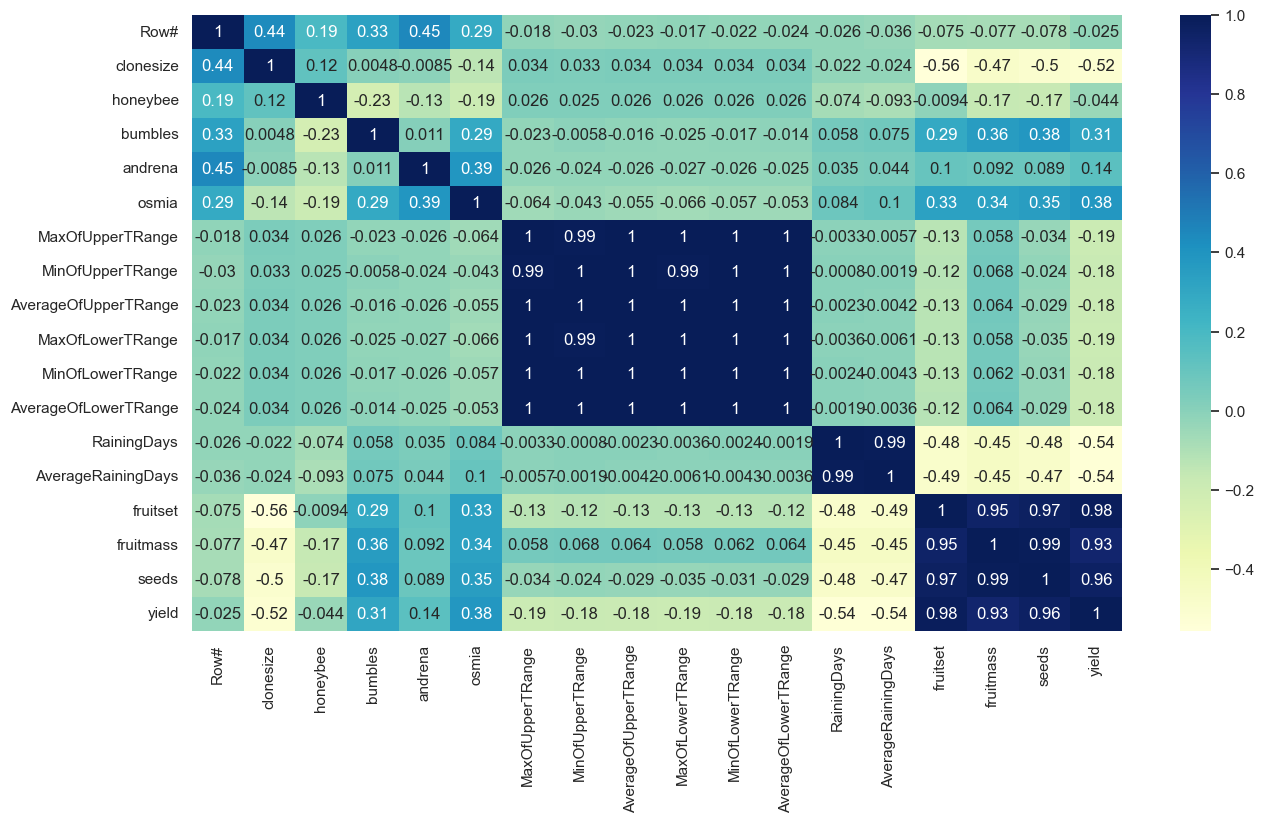

In [17]:
# Heatmap
plt.figure(figsize =(15,8))
sns.heatmap(df_eda.corr(numeric_only = True),annot = True,cmap = "YlGnBu")
plt.show()

<!-- CSS Styling -->
<style>
.center-div {
    margin: 0 auto;
    width: 800px;
    background-color: #FFFF99;
    border: 2px solid black;
    color: black;
    text-align: center;

}
</style>

<div class="center-div"">
    ⚠️There is a high correlation among some<br> independent variables which indicate the possibility of <strong>multicollinearity</strong>.
</div>

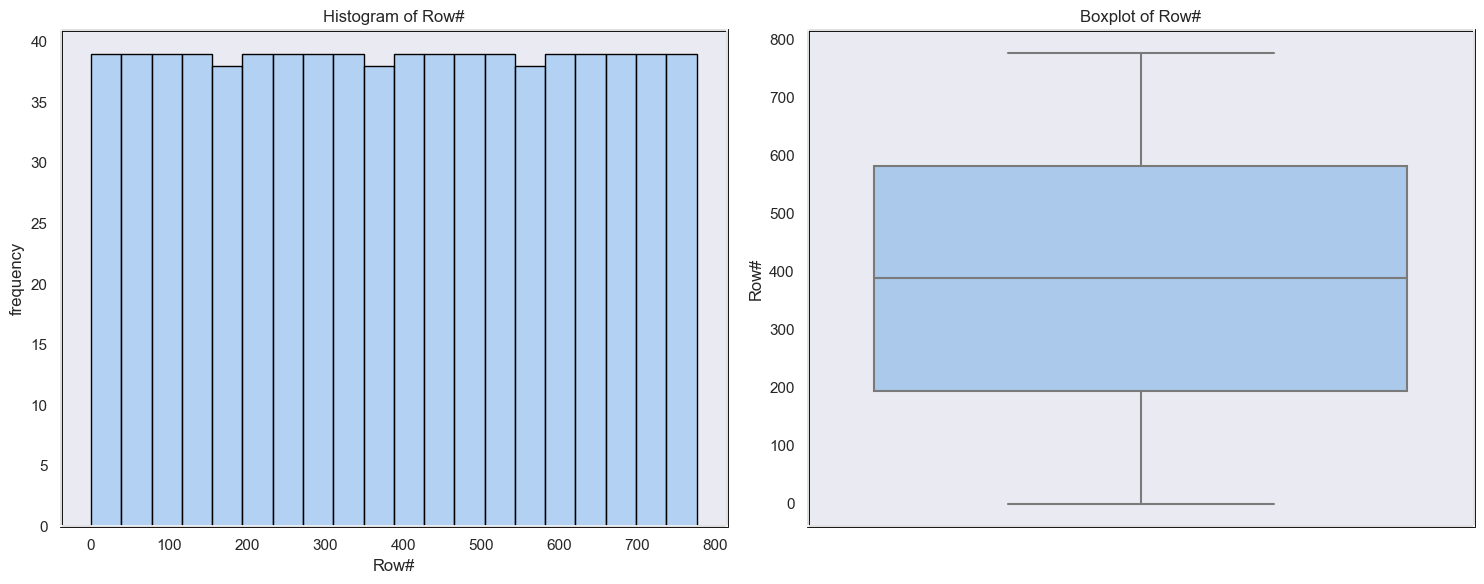

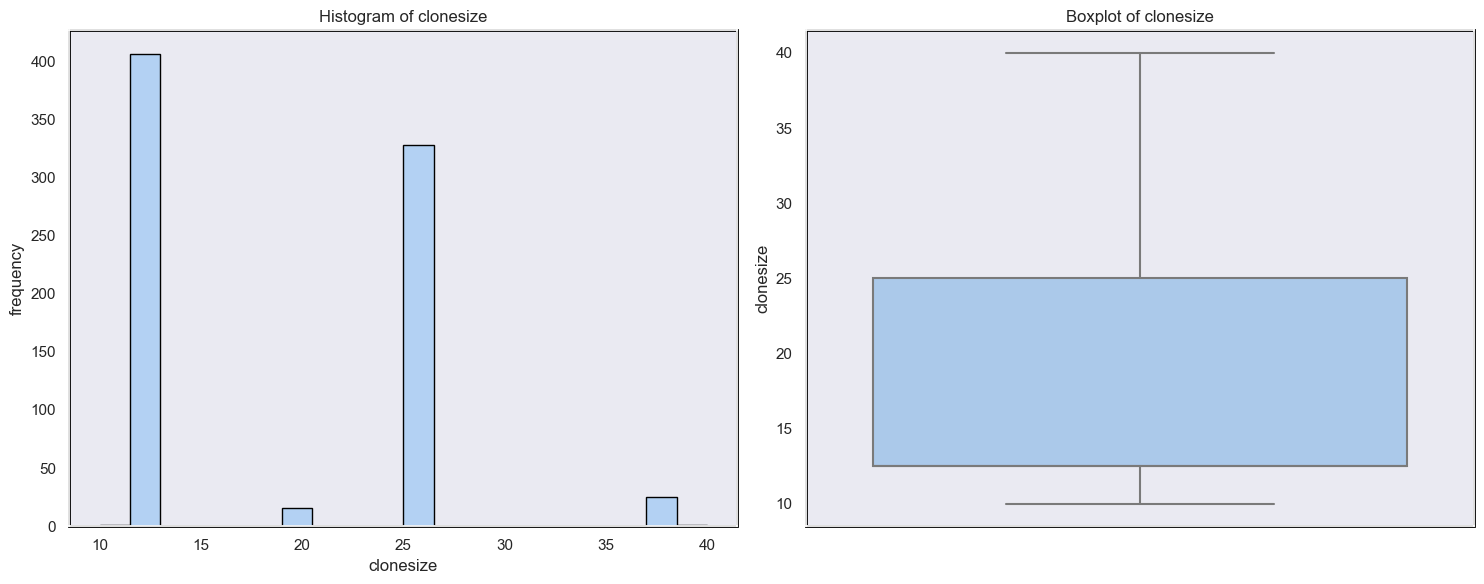

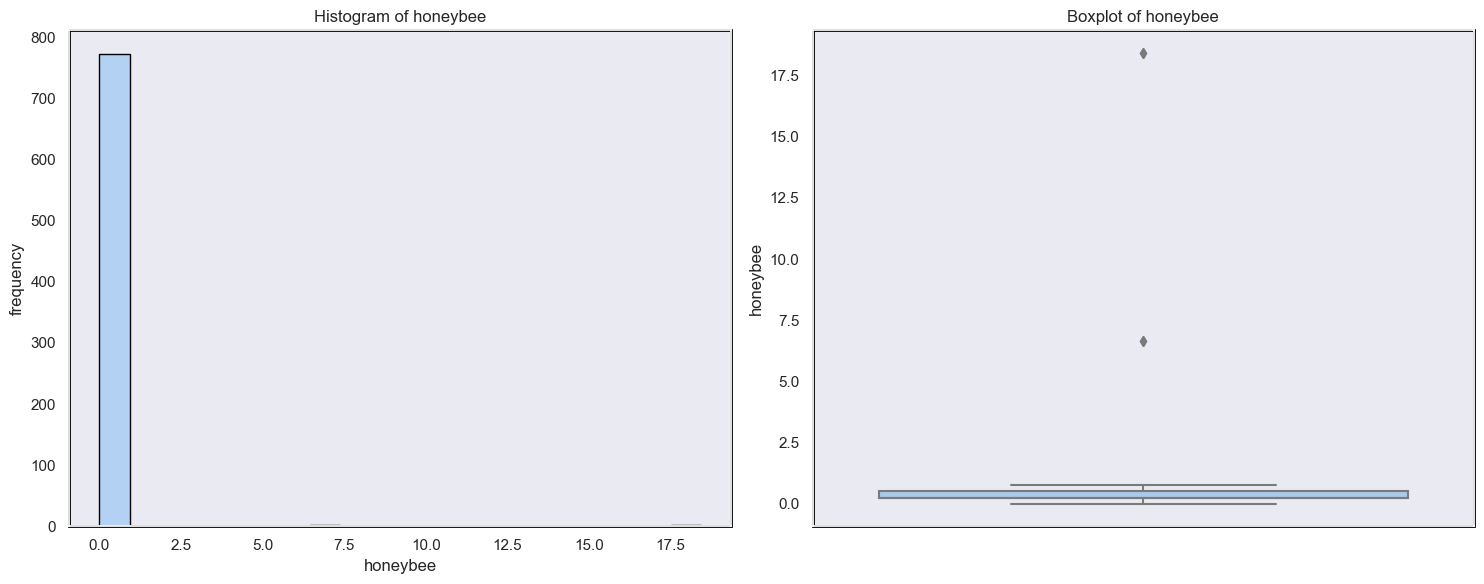

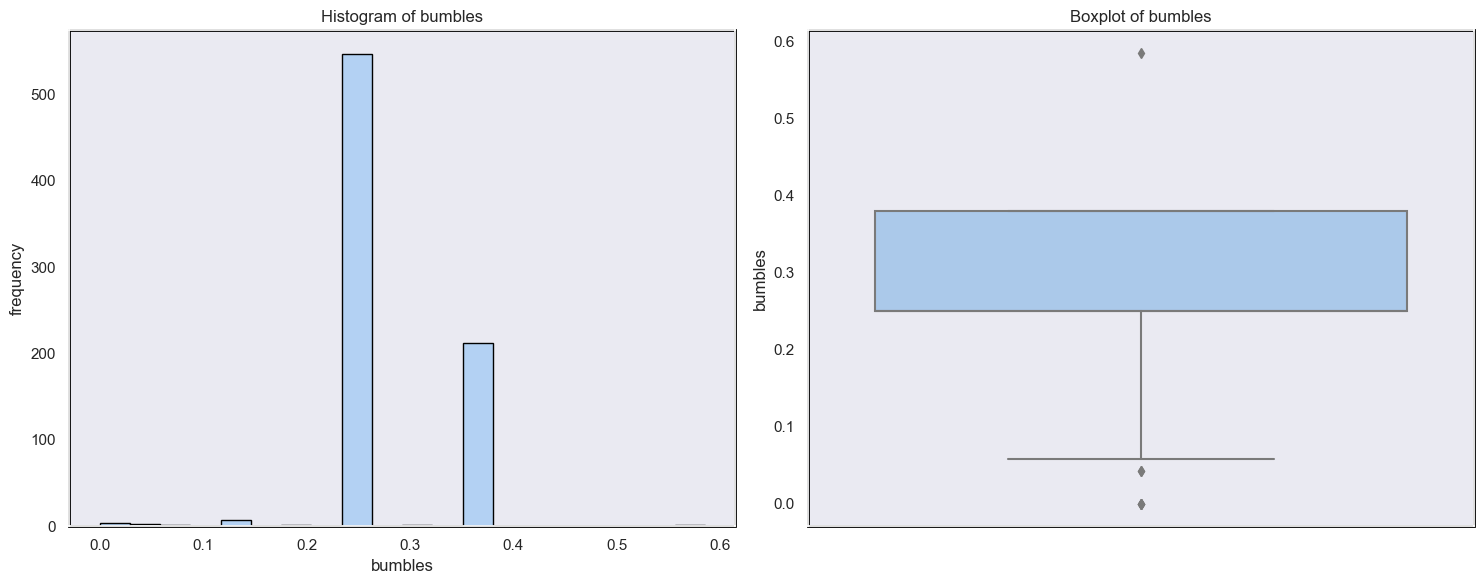

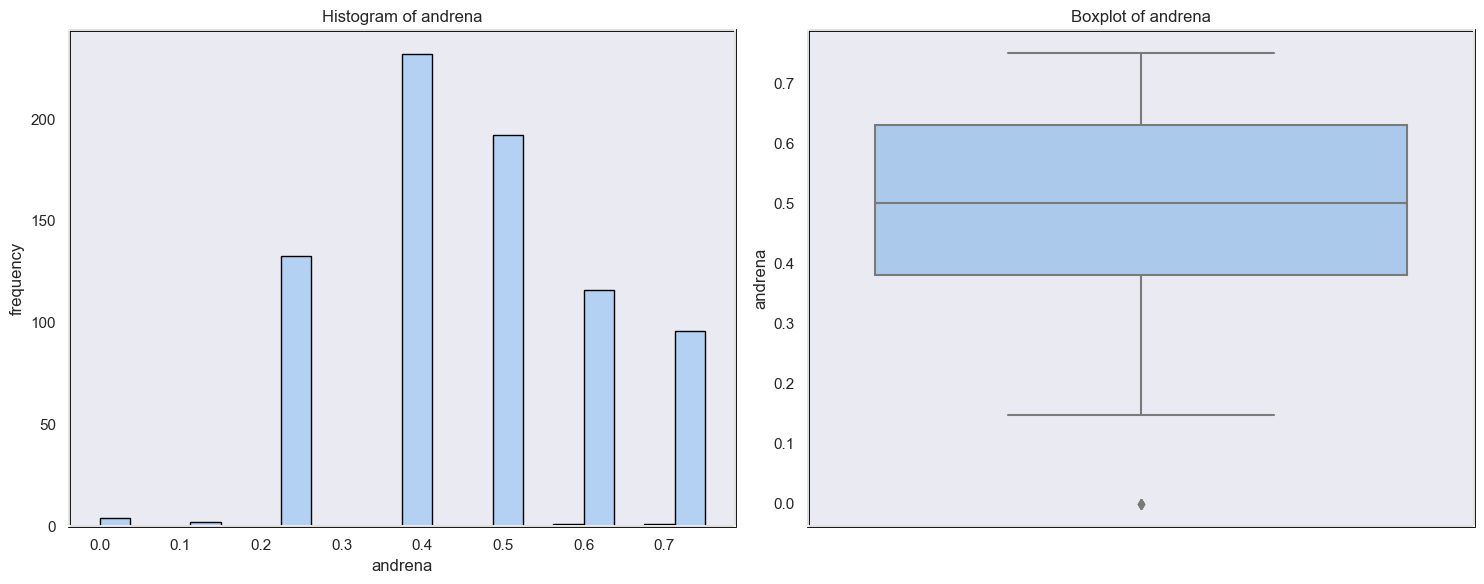

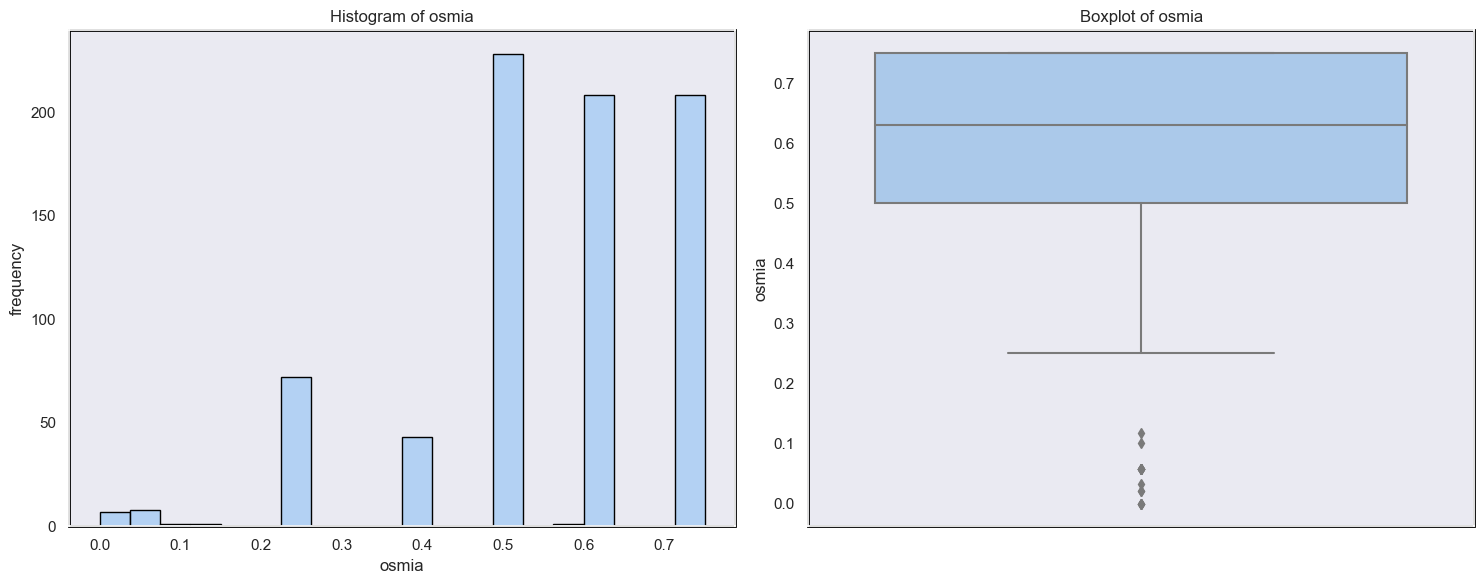

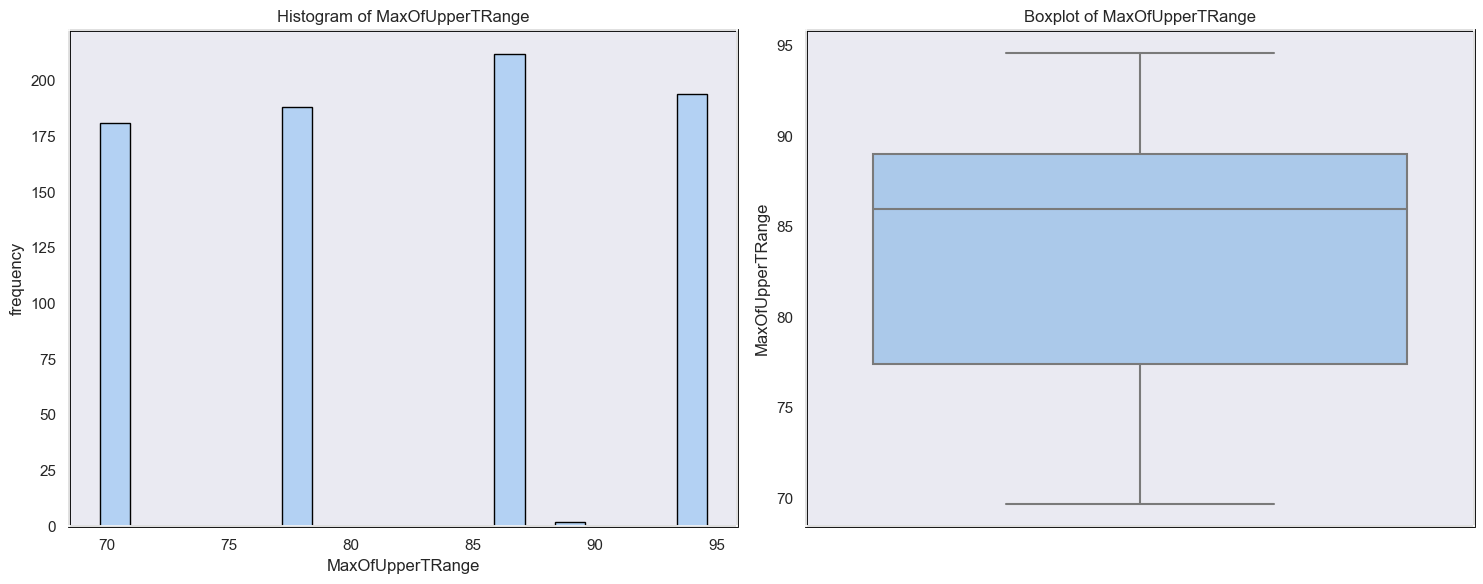

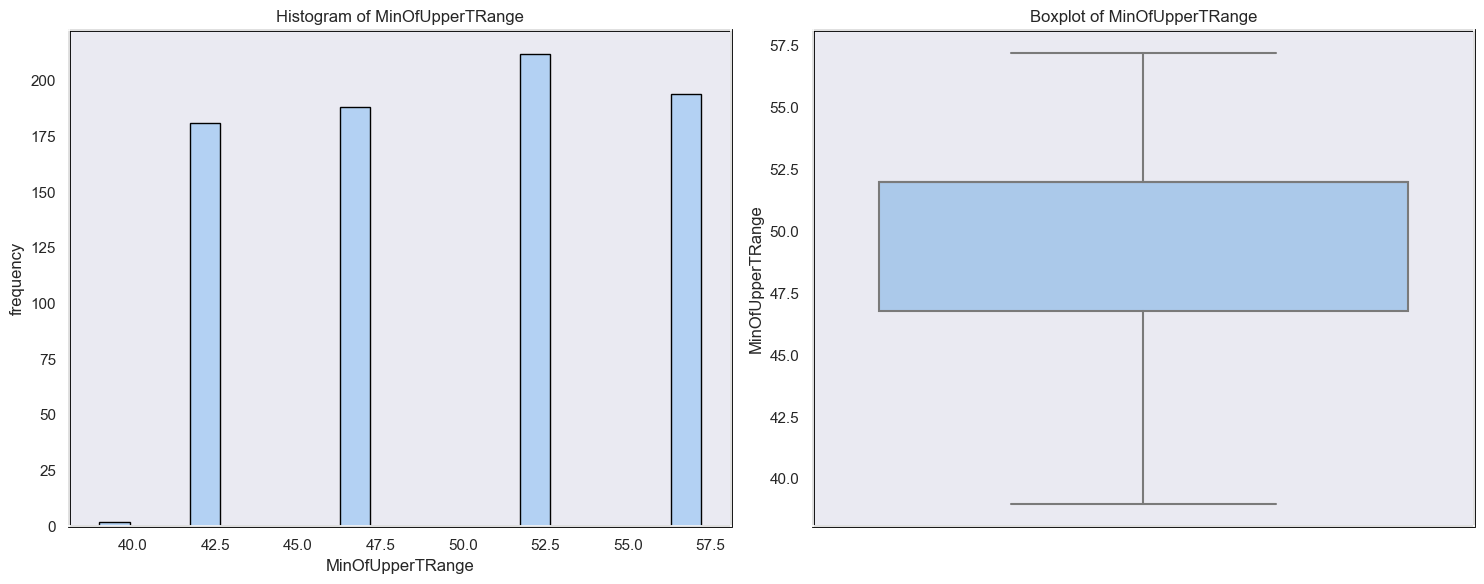

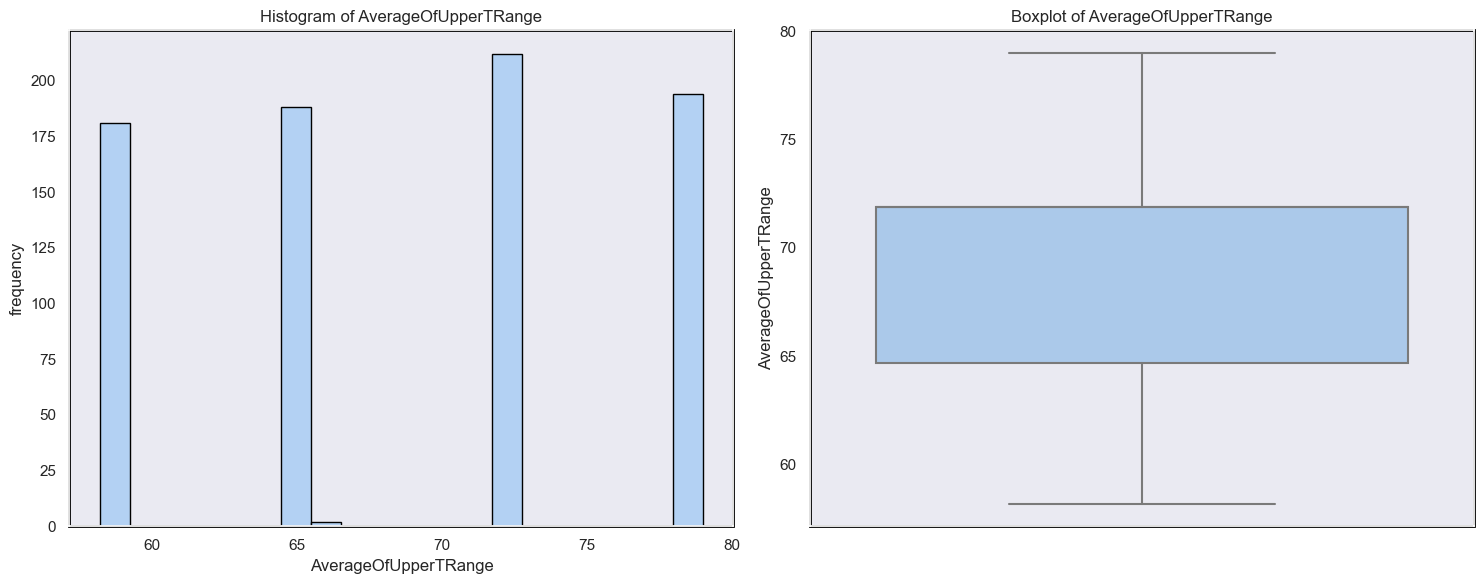

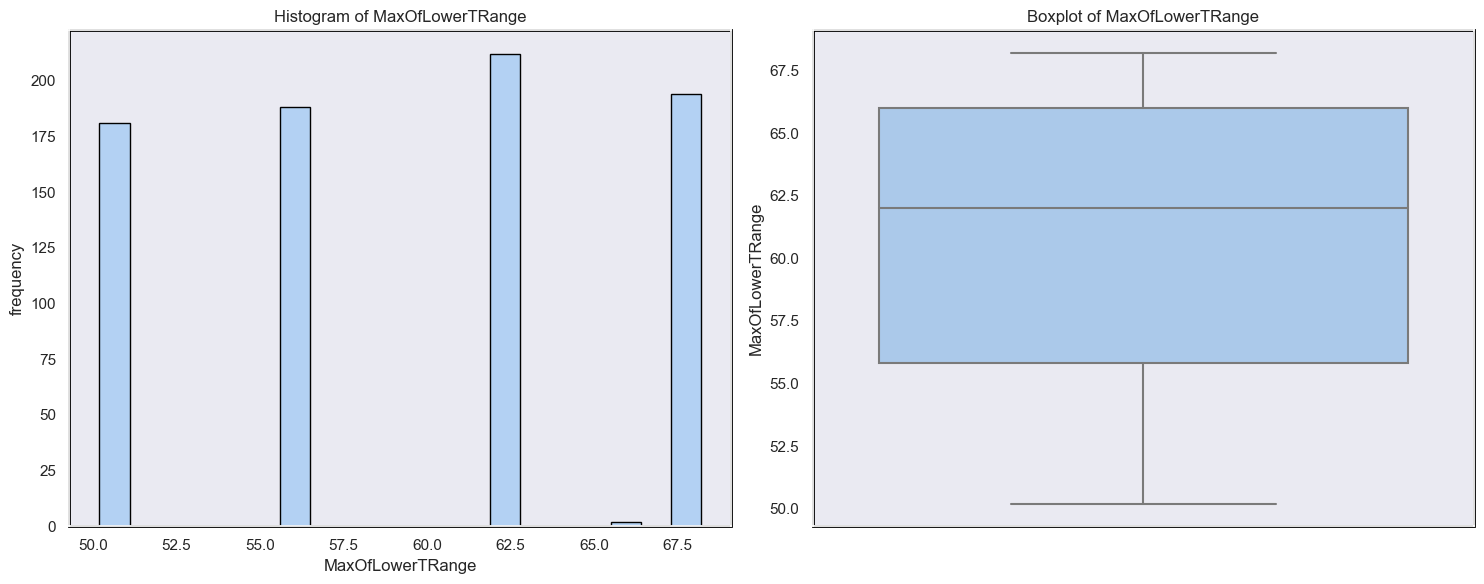

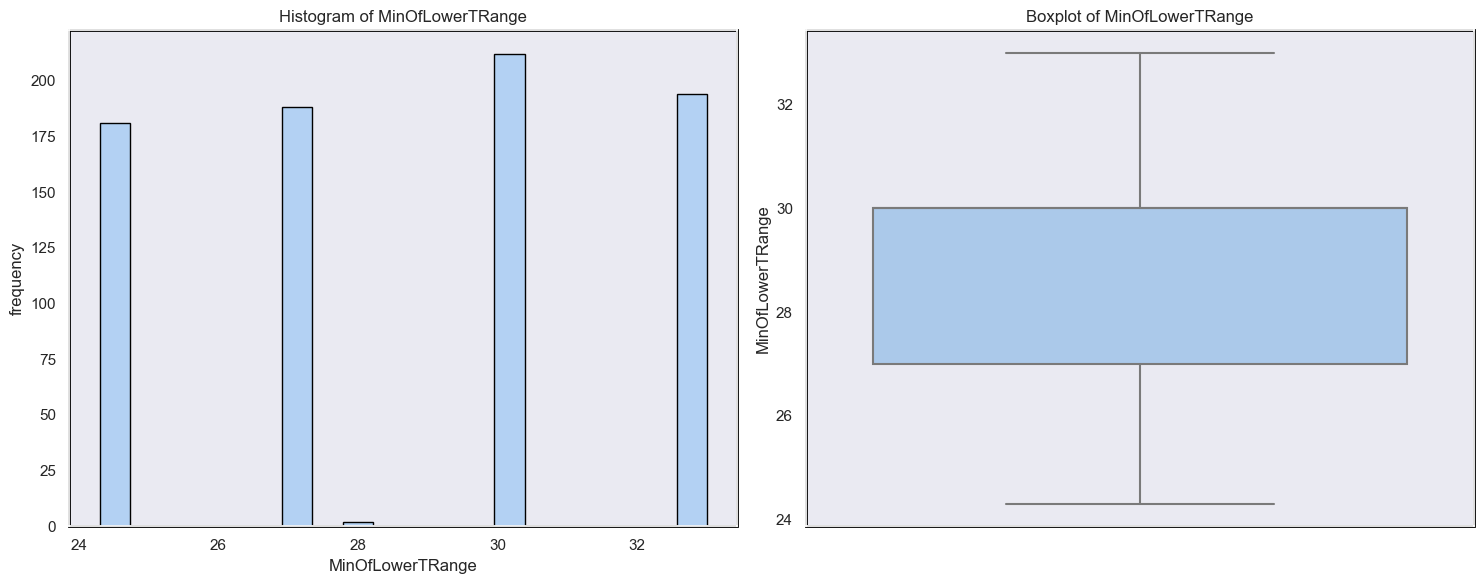

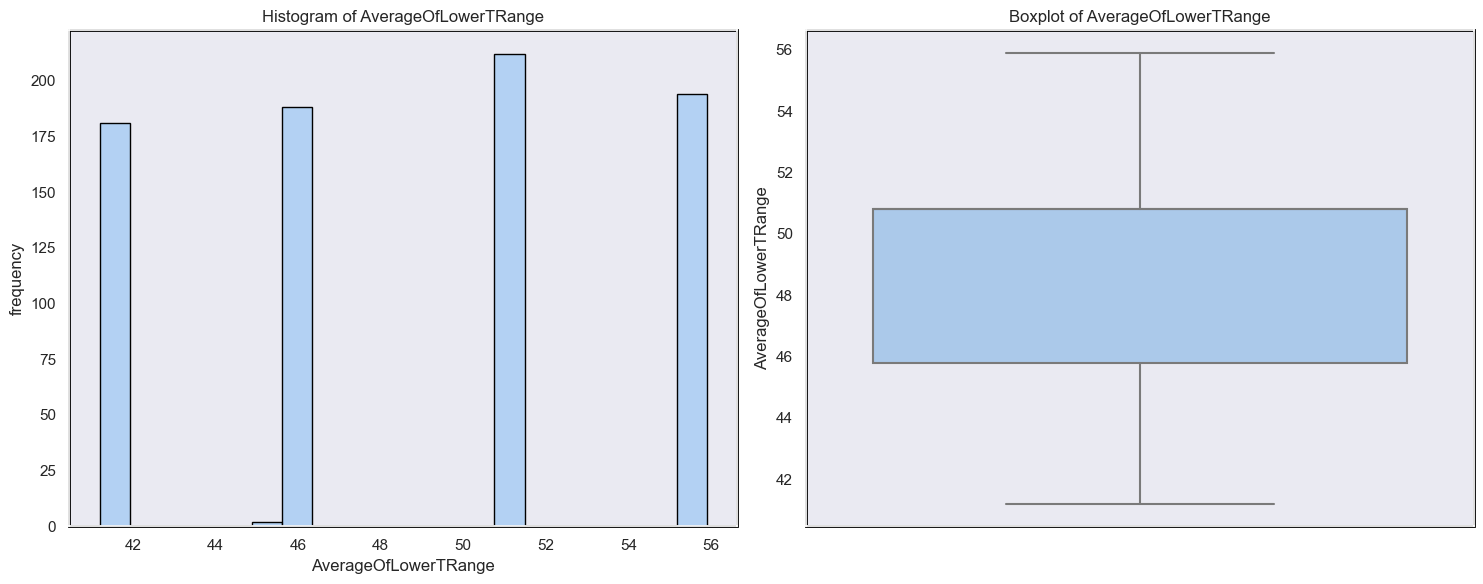

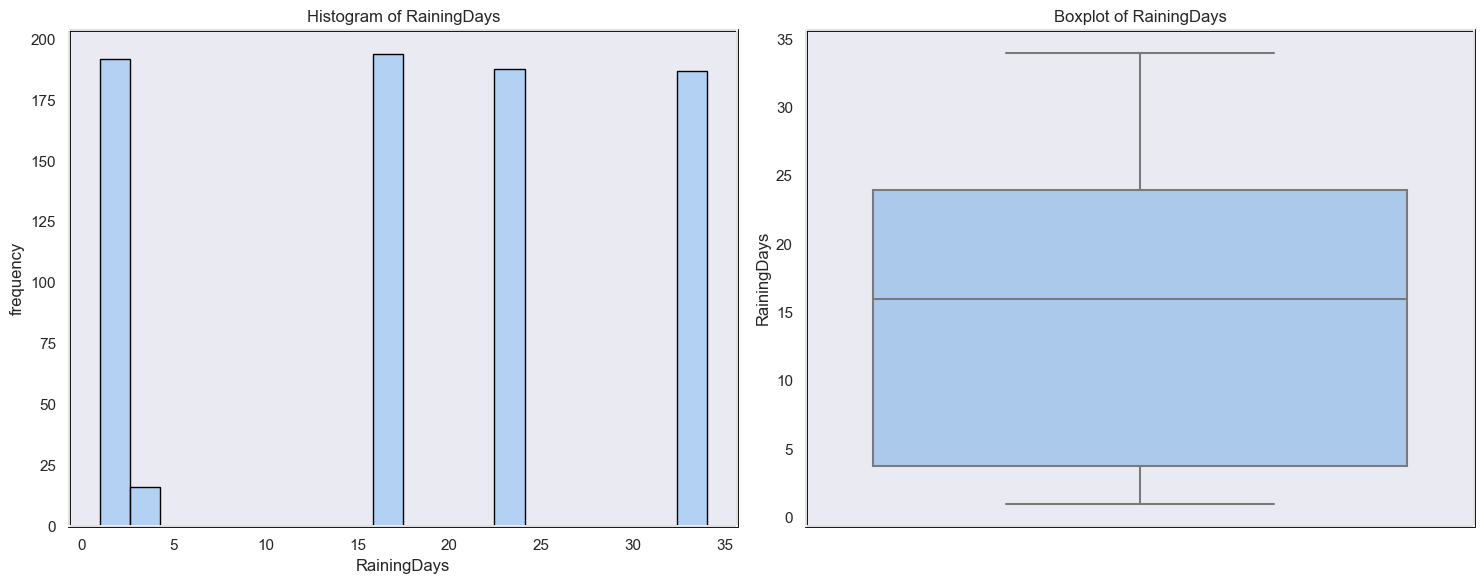

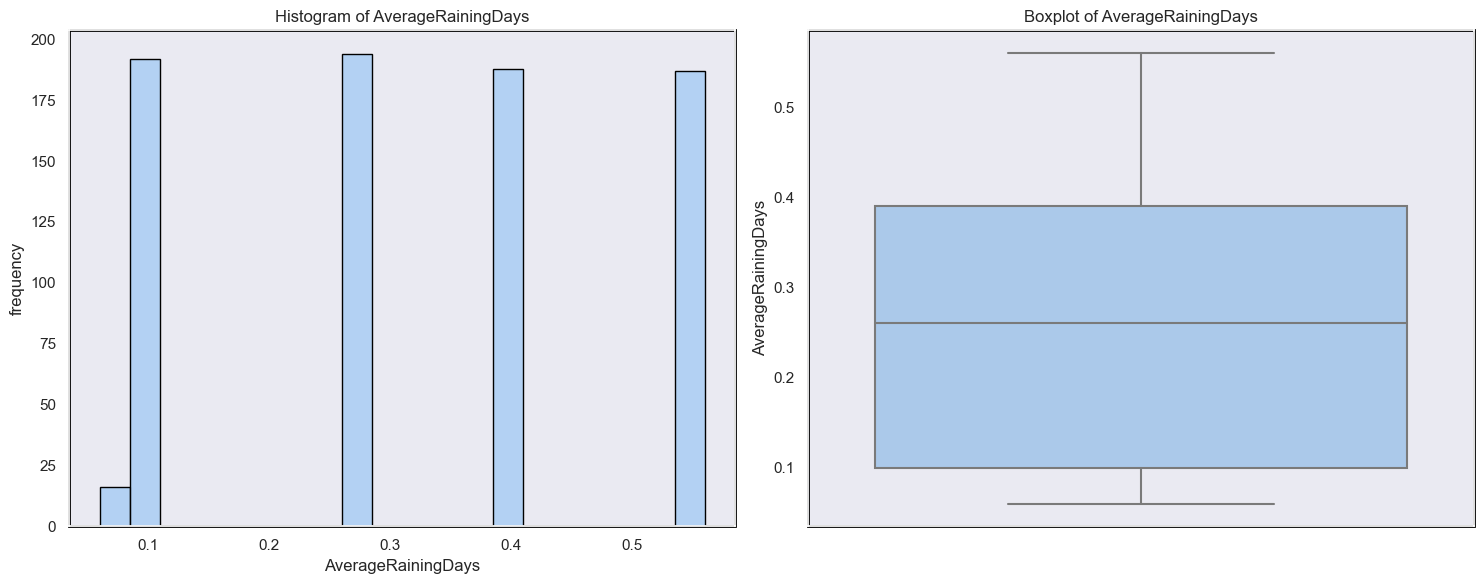

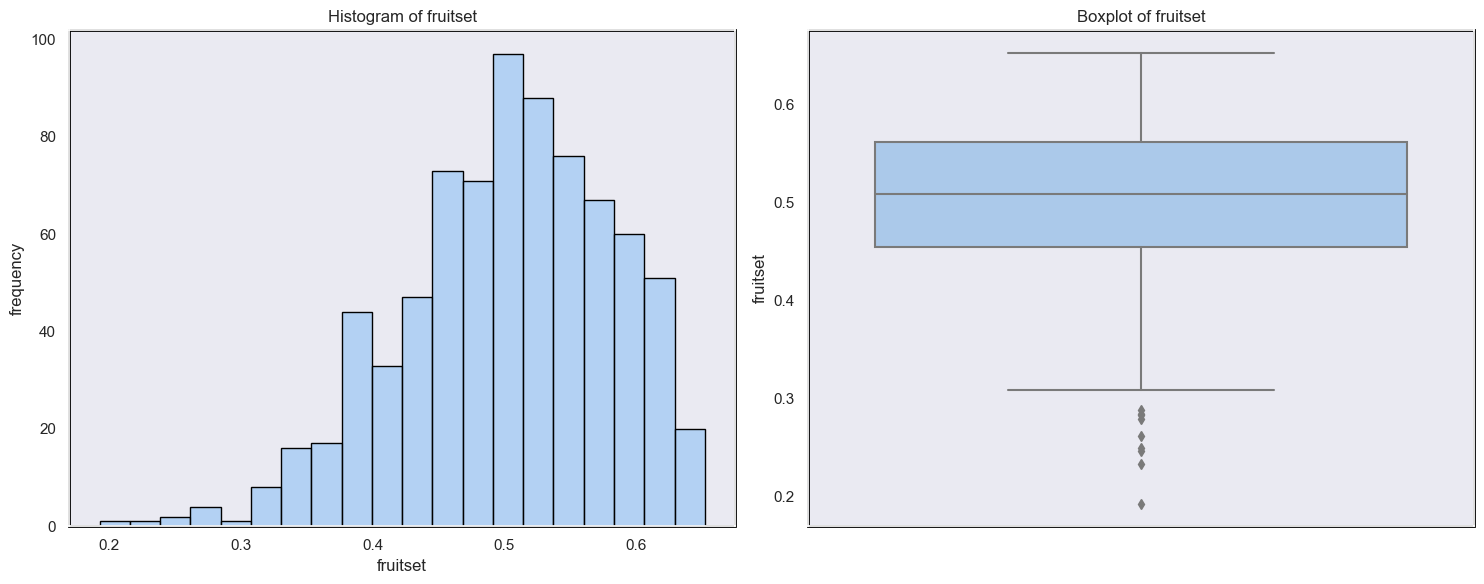

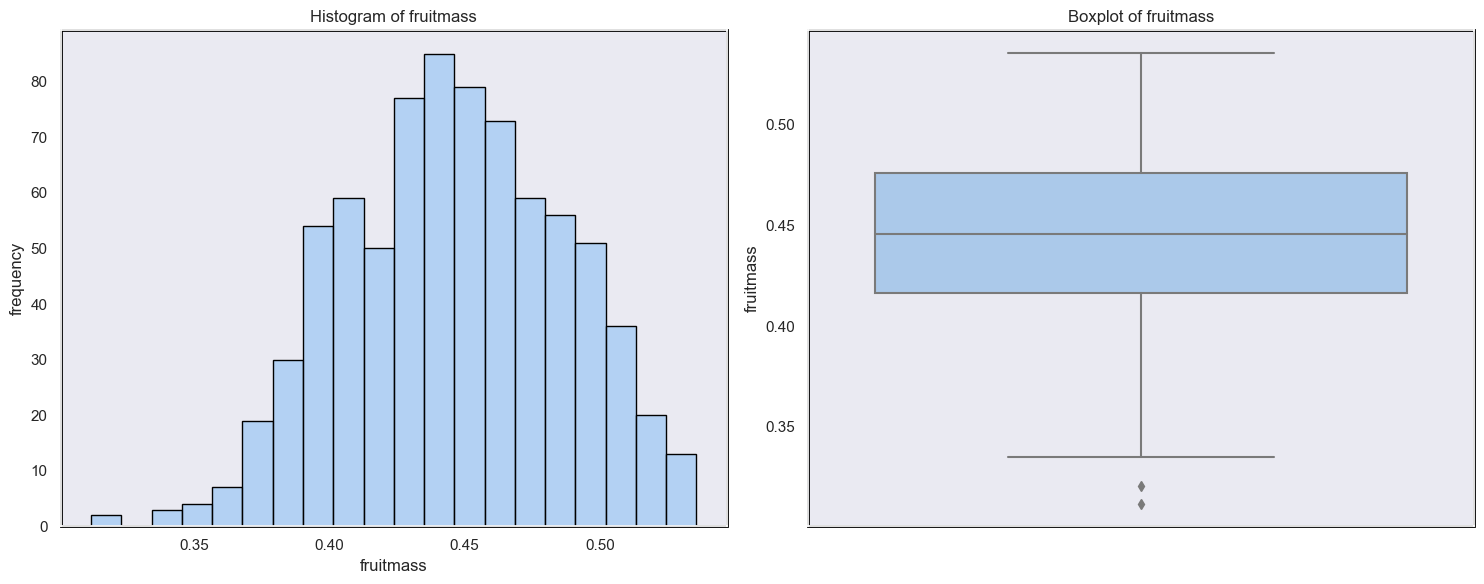

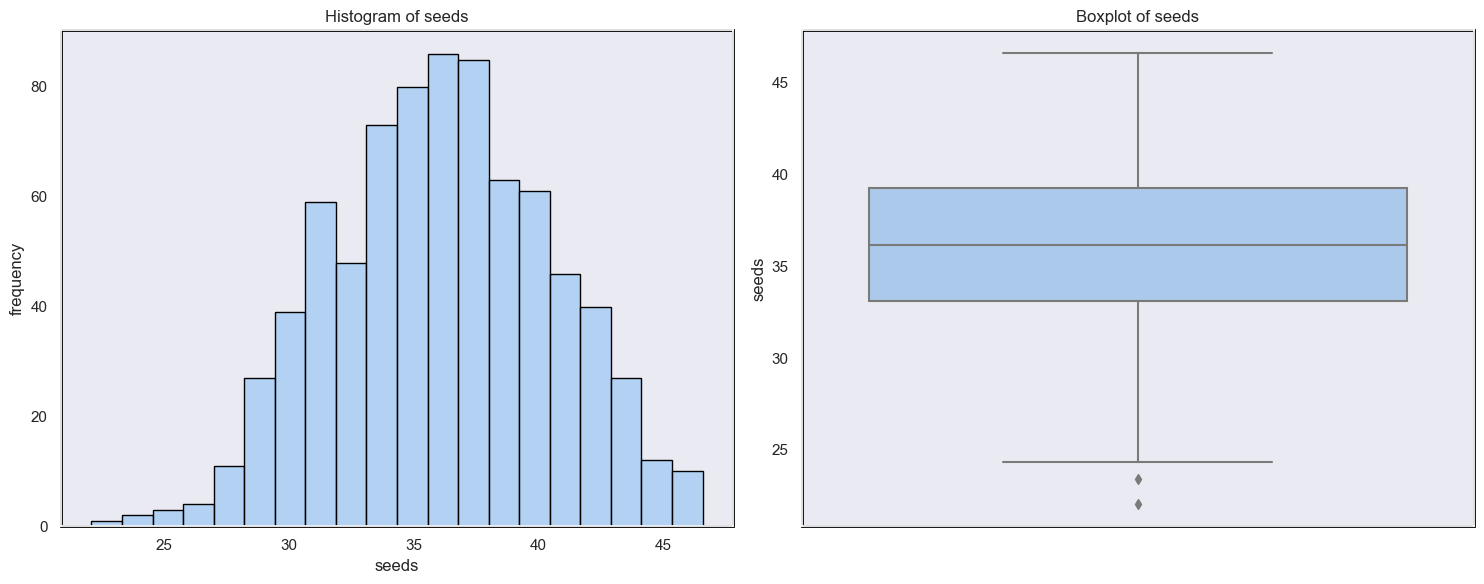

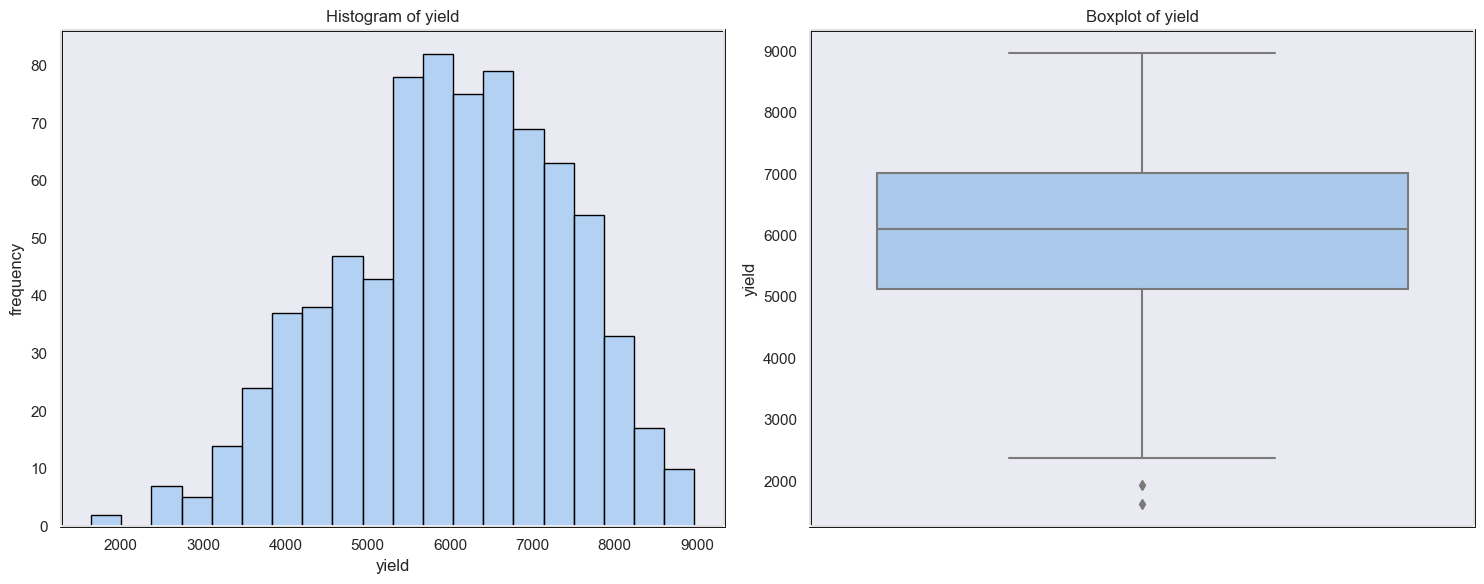

In [18]:
plot_numerical_histogram_boxplot(df_eda)

### Multicollinearity

In [19]:
df_vif = df_eda.copy(deep=True)

In [20]:
calculate_vif(df_vif, 'yield') # Function defined above.

,Variable,VIF
0,Row#,3.27
1,clonesize,3.89
2,honeybee,3.60
3,bumbles,3.44
4,andrena,1.90
5,osmia,2.24
6,MaxOfUpperTRange,inf
7,MinOfUpperTRange,inf
8,AverageOfUpperTRange,98186220.63
9,MaxOfLowerTRange,inf


<!-- CSS Styling -->
<style>
.observation {
    margin: 0 auto;
    background-color: #FFFF99; /* Pastel Blue */
    width: 1200px;
    padding: 10px;
    border: 2px solid black;
    color: black; /* Set the text color to black */
}
</style>

<div class="observation">
    ⚠️<strong>Variance Inflation Factor (VIF)</strong>:<br><br>
    1. '<em>MaxOfUpperTRange</em>', '<em>MinOfUpperTRange</em>', '<em>MaxOfLowerTRange</em>', '<em>MinOfLowerTRange</em>' have a VIF reaching <strong>infinity</strong> implying these might be directly dependent on other variables.<br><br>
    2. '<em>AverageOfUpperTRange</em>', '<em>AverageOfLowerTRange</em>', '<em>fruitmass</em>', '<em>seeds</em>', '<em>fruitset</em>', '<em>AverageRainingDays</em>', '<em>RainingDays</em>'<br> have <strong>extremely high</strong> multicollinearity, which can distort analysis results.<br><br>
    3. '<em>clonesize</em>', '<em>honeybee</em>', '<em>bumbles</em>', '<em>osmia</em>', '<em>andrena</em>'<br> have <strong>relatively lower</strong> VIF compared to the extremely high ones.
</div>


## Insights

## Preprocessing

## Dataframe Pipeline

This section provides a clear view of the data processing pipeline.

1. **Initial Dataframe**

- **Name:** `df`
- **Description:** This is the initial dataframe containing the raw data.

2. **Exploratory Data Analysis (EDA)**

- **Name:** `df_eda`
- **Description:** A deep copy of the initial dataframe `df`, used for exploratory data analysis.

3. **Heading**

- **Name:** `df_`
- **Description:** Description of the dataset


. **Final Dataset for Modeling**

- **Name:** `X_train_final`, `X_test_final`, `X_val_final`
- **Description:** The final datasets used for machine learning modeling, including preprocessing steps like feature scaling, encoding, and feature selection.